## EDA + translate


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# if you use Google Colab, un-comment this cell, modify `path_to_data` if needed, and run to mount data to `data`
from google.colab import drive
drive.mount('/content/drive')
path_to_data = '/content/drive/MyDrive/COMP4332/COMP4332/Project1/data'
#!rm -f data
#!ln -s '/content/drive/COMP4332/COMP4332/Project1/data' data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (1) Loading data
The following code shows how to load the datasets for this project.  
Among which, we do not release the labels (the "stars" column) for the test set. You may evaluate your trained model on the validation set instead.

However, your submitted predictions (``pred.csv``) should be generated on the test set.

In [ ]:
def load_data(split_name='train', columns=['text', 'stars'], folder='data'):
    '''
        "split_name" may be set as 'train', 'valid' or 'test' to load the corresponding dataset.
        
        You may also specify the column names to load any columns in the .csv data file.
        Among many, "text" can be used as model input, and "stars" column is the labels (sentiment). 
        If you like, you are free to use columns other than "text" for prediction.
    '''
    try:
        print(f"select [{', '.join(columns)}] columns from the {split_name} split")
        df = pd.read_csv(f'{folder}/{split_name}.csv')
        df = df.loc[:,columns]
        print("Success")
        return df
    except:
        print(f"Failed loading specified columns... Returning all columns from the {split_name} split")
        df = pd.read_csv(f'{folder}/{split_name}.csv')
        return df

In [ ]:
train_df = load_data('train', columns=['text', 'cool','funny','useful','stars'],folder = path_to_data)
valid_df = load_data('valid', columns=['text', 'cool','funny','useful','stars'],folder = path_to_data)
# the test set labels (the 'stars' column) are not available! So the following code will instead return all columns
test_df = load_data('test', columns=['text', 'cool','funny','useful','stars'],folder = path_to_data)

select [text, cool, funny, useful, stars] columns from the train split
Success
select [text, cool, funny, useful, stars] columns from the valid split
Success
select [text, cool, funny, useful, stars] columns from the test split
Failed loading specified columns... Returning all columns from the test split


(array([2659., 1426., 1969., 4008., 7938.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

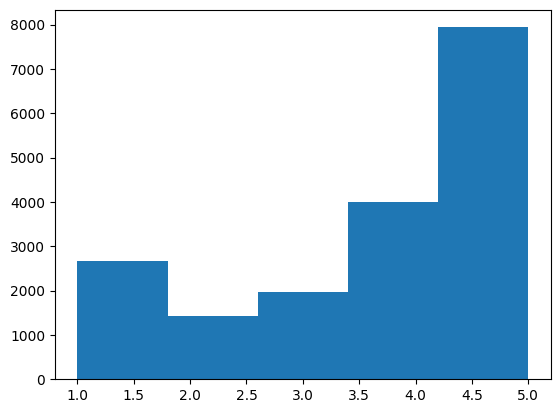

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_df['stars'], bins=5)

## create augmented dataset for 'stars = 2'

### extract and creat input file

In [ ]:
stars_2 = train_df[train_df['stars']==2]
stars_2 = stars_2[['stars','text']]

stars_2 = stars_2.reset_index(drop=True)
stars_2.head()

,stars,text
0,2,"Location is nice, but it is the typical blah H..."
1,2,I really wanted to like this place since my wi...
2,2,"In a word, disappointing. I've never dined at..."
3,2,Food was very bland. Ordered the breakfast bur...
4,2,"I ordered a lychee boba, and was so excited.. ..."


In [ ]:
# remove '\n'
for i in range(stars_2.shape[0]):
  stars_2.iloc[i,1] = stars_2.iloc[i,1].replace('\n','').replace('\r','')

In [ ]:
stars_2.to_csv('/content/drive/MyDrive/COMP4332/COMP4332/Project1/data/augmented_stars_2.txt',
               encoding='utf-8',header=False,
               sep='\t',index=False,mode='w')

### call EDA

In [ ]:
# follow the instruction from https://github.com/jasonwei20/eda_nlp
# attention: 
# for input txt file: remove '/n' so that text(comments) would not be affacted by '\n' in .readlines()
# for open() in augment.py, add 'errors='ignore' to avoid illegal characters
# lines = open(train_orig, 'r',errors='ignore').readlines() # ignore error!!!!
'''@inproceedings{wei-zou-2019-eda,
    title = "{EDA}: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks",
    author = "Wei, Jason  and
      Zou, Kai",
    booktitle = "Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing and the 9th International Joint Conference on Natural Language Processing (EMNLP-IJCNLP)",
    month = nov,
    year = "2019",
    address = "Hong Kong, China",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/D19-1670",
    pages = "6383--6389",
}'''



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### parameters
The default output filename will append eda_ to the front of the input filename, but you can specify your own with --output. You can also specify the number of generated augmented sentences per original sentence using --num_aug (default is 9). Furthermore, you can specify different alpha parameters, which approximately means the percent of words in the sentence that will be changed according to that rule (default is 0.1 or 10%). So for example, if your input file is sst2_train.txt and you want to output to sst2_augmented.txt with 16 augmented sentences per original sentence and replace 5% of words by synonyms (alpha_sr=0.05), delete 10% of words (alpha_rd=0.1, or leave as the default) and do not apply random insertion (alpha_ri=0.0) and random swap (alpha_rs=0.0), you would do:
Note that at least one augmentation operation is applied per augmented sentence regardless of alpha (if greater than zero). So if you do alpha_sr=0.001 and your sentence only has four words, one augmentation operation will still be performed. Of course, if one particular alpha is zero, nothing will be done.

In [ ]:
# window:  
# import nltk; nltk.download('wordnet')
# python "c:\Users\...\eda\eda_nlp-master\eda_nlp-master\code\augment.py" --input="C:\Users\...\eda\eda_nlp-master\eda_nlp-master\code\augmented_stars_2_aug.txt" --num_aug=16 --alpha_sr=0.05 --alpha_rd=0.1 --alpha_ri=0.0 --alpha_rs=0.0

import nltk; nltk.download('wordnet')
!python /content/drive/MyDrive/COMP4332/COMP4332/Project1/eda_nlp-master/code/augment.py --input /content/drive/MyDrive/COMP4332/COMP4332/Project1/data/augmented_stars_2.txt --output=/content/drive/MyDrive/COMP4332/COMP4332/Project1/data/sst2_augmented.txt --num_aug=4 --alpha_sr=0.05 --alpha_rd=0.1 --alpha_ri=0.0 --alpha_rs=0.0

generated augmented sentences with eda for /content/drive/MyDrive/COMP4332/COMP4332/Project1/data/augmented_stars_2.txt to /content/drive/MyDrive/COMP4332/COMP4332/Project1/data/sst2_augmented.txt with num_aug=4


### augmented data: txt --> csv in original form

In [ ]:
import csv

with open('/content/drive/MyDrive/COMP4332/COMP4332/Project1/data/sst2_augmented.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split("\t") for line in stripped if line)
    with open('/content/drive/MyDrive/COMP4332/COMP4332/Project1/data/stars_2_augmented.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('stars', 'text'))
        writer.writerows(lines)

In [ ]:
aug_df = load_data('stars_2_augmented', columns=['text','stars'],folder = path_to_data)

select [text, stars] columns from the stars_2_augmented split
Success


In [ ]:
aug_df

,text,stars
0,location is nice but it is the typical blah hi...,2
1,location is nice but it is the typical blah hi...,2
2,location is nice but it is the typical blah hi...,2
3,location is nice but it is the typical blah hi...,2
4,location is nice but it is the typical blah hi...,2
...,...,...
7125,went there again last night for the burger sup...,2
7126,went there again last night for the burger to ...,2
7127,went again last night for the burger supposed ...,2
7128,went there again last night for the burger sup...,2


In [ ]:
# Rearrange
from sklearn.utils import shuffle
train_aug_df = pd.concat([train_df[['stars','text']],aug_df[['stars','text']]],axis=0,ignore_index=True)
train_aug_df = shuffle(train_aug_df).reset_index(drop=True)

In [ ]:
# input series
x_train_aug = train_aug_df['text']
y_train_aug = train_aug_df['stars']
x_valid = valid_df['text']
y_valid = valid_df['stars']

# input dataframe
x_train_aug_df = train_aug_df[['text']]
y_train_aug_df = train_aug_df[['stars']]
x_valid_df = valid_df[['text']]
y_valid_df = valid_df[['stars']]